__<font size="5">Project 1 Proposal Level-2 </font>__

***Predicting House Prices with Linear Regression***

**Author:** *Alidu Okpanachi*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

__<font size="6">Table of Contents</font>__


* [Introduction](#Introduction)
* [Data Description](#Description)
* [Data Preparation](#Preparation)
    * [Duplicates](#Duplicates)
    * [Missing Values](#Missing)
    * [Missing values](#Missing)    
    * [Outliers](#Outliers)
    * [Data Transformation](#Transformation)
    
* [Exploratory Data Analysis](#EDA)
    * [Univariate Analysis](#Univar)
    * [Bivariate analysis](#Bivar)
    * [Multivariate Analysi](#Multivar)       
* [Modelling](#Modelling)
    * [Linear Regression Model](#Model1)
    * [Prediction](#Prediction)
    * [Model Evaluation](#Evaluation)
    * [Interpretation of Model Coefficients](#Interpretation)
    * [Visualize Feature Coefficients](#Coefficients)
    * [Save the Results](#Results)
    * [Filter](#Filter)
    * [Confusion Matrix](#Confusion)
    * [Recommendation](#Recommendation)

# Introduction <a class="anchor" id="Introduction"></a>

This project focuses on building a predictive model using linear regression to estimate house prices based on a variety of features from a real-world housing dataset. Linear regression is one of the most foundational and widely used algorithms in machine learning, making it an excellent starting point for understanding predictive modeling.

The goal of this project is not only to train a model that predicts prices accurately but also to understand the underlying relationships between the input features and the target variable (price). Through careful data preparation, modeling, and interpretation, we aim to extract meaningful insights from the data and assess how each factor contributes to a home’s value.

🔍 Key Areas Covered
Data Collection and Preparation
We begin by examining the Housing dataset, which contains numerical and categorical features relevant to house pricing. Basic data cleaning steps such as handling missing values, encoding categorical variables, and ensuring data consistency are performed.

Feature Selection
Relevant features (such as area, number of bedrooms, bathrooms, furnishing status, and location attributes) are selected for training. These features are expected to have direct influence on house pricing.

Model Training with Linear Regression
Using the scikit-learn library, we train a linear regression model that learns the linear relationships between the selected features and house price.

Model Evaluation
The model is evaluated using standard regression metrics such as Mean Squared Error (MSE) and R-squared (R²), which help us understand how well the model is performing on unseen data.

Visualization
To interpret and validate the model, we visualize actual vs predicted house prices, as well as the influence of each feature using bar charts of model coefficients.



# Data Description <a class="anchor" id="Description"></a>
The objective of this project is to build a predictive model using linear regression to estimate a
fundamental machine learning algorithm, and this project provides hands-on experience in
developing, evaluating, and interpreting a predictive model.

# Data Preparation <a class="anchor" id="Preparation"></a>

To analyze the data for the second phase of my Project, I copied House_data to prices_model where I using one-hot econding and drop the first category to avoid multicollinearity

In [2]:
#load dataset to the environment
House_data = pd.read_csv("Housing.csv")

In [3]:
#view the first five rows of the dataset
House_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#view the last five rows of the dataset
House_data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
#show descriptive statistics of the dataset
House_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
#checking the data type
House_data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [7]:
#checking the data info
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Duplicates <a class="anchor" id="Duplicates"></a>

In [8]:
House_data.duplicated().sum()

0

In [9]:
#checking for duplicates
House_data.duplicated().sum()

0

 I checked for duplicate in the dataset i observed there is no duplicate in the dataset

## Missing Values <a class="anchor" id="Missing"></a>

In [10]:
#checking for missing value
print(House_data.isnull().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


I checked for missing valve and there is no missing valve in the dataset

## Outliers <a class="anchor" id="Outliers"></a>

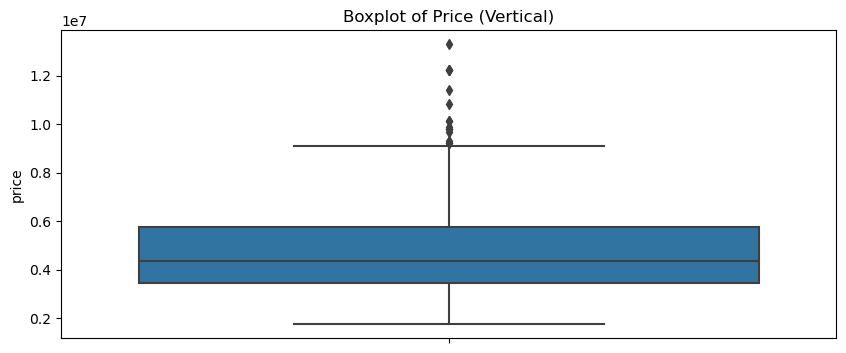

In [11]:
# Checking for outliers using a vertical boxplot
plt.figure(figsize=(10, 4)) # Taller figure for better vertical display
sns.boxplot(y=House_data['price'])
plt.title("Boxplot of Price (Vertical)")
plt.ylabel('price')
plt.show()

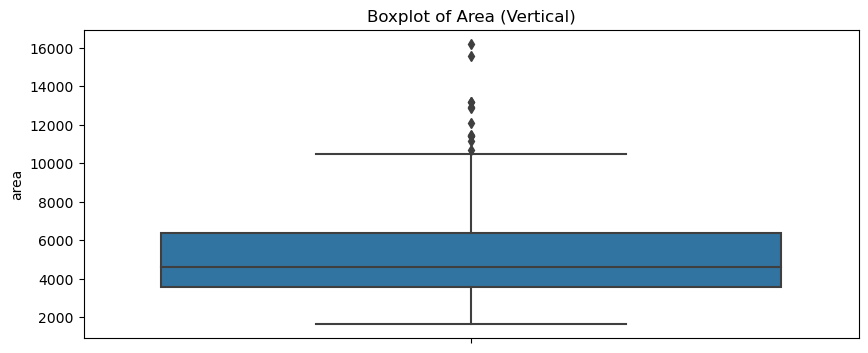

In [12]:
# Checking for outliers using a vertical boxplot
plt.figure(figsize=(10, 4)) # Taller figure for better vertical display
sns.boxplot(y=House_data['area'])
plt.title("Boxplot of Area (Vertical)")
plt.ylabel('area')
plt.show()

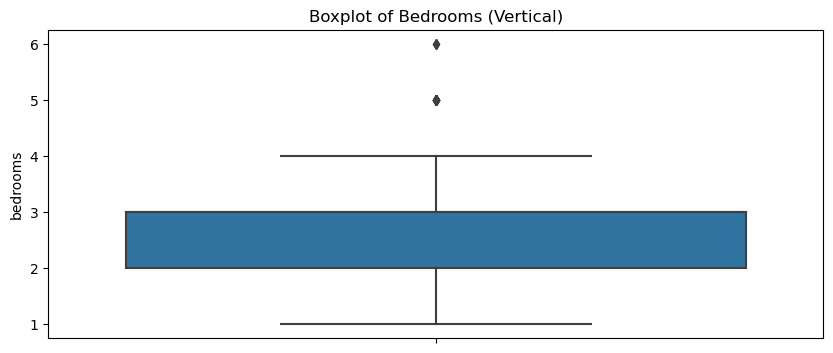

In [13]:
# Checking for outliers using a vertical boxplot
plt.figure(figsize=(10, 4)) # Taller figure for better vertical display
sns.boxplot(y=House_data['bedrooms'])
plt.title("Boxplot of Bedrooms (Vertical)")
plt.ylabel('bedrooms')
plt.show()





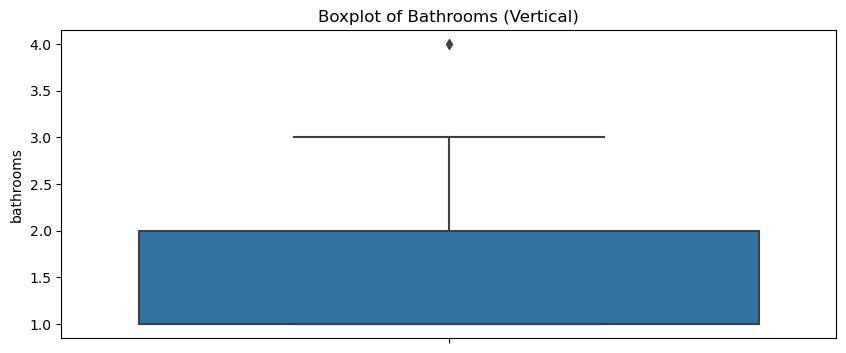

In [14]:
# Checking for outliers using a vertical boxplot
plt.figure(figsize=(10, 4)) # Taller figure for better vertical display
sns.boxplot(y=House_data['bathrooms'])
plt.title("Boxplot of Bathrooms (Vertical)")
plt.ylabel('bathrooms')
plt.show()

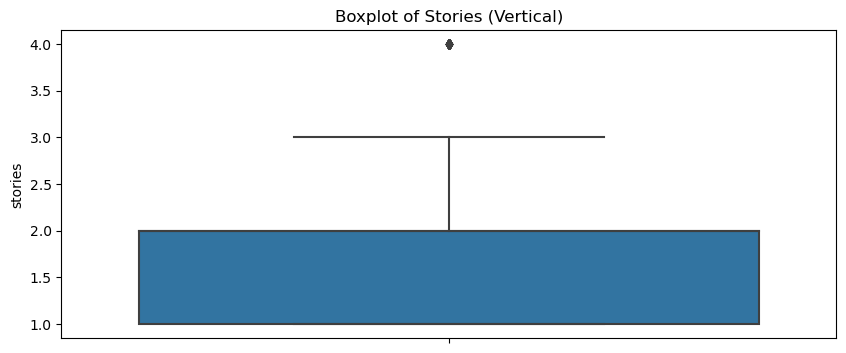

In [15]:
# Checking for outliers using a vertical boxplot
plt.figure(figsize=(10, 4)) # Taller figure for better vertical display
sns.boxplot(y=House_data['stories'])
plt.title("Boxplot of Stories (Vertical)")
plt.ylabel('stories')
plt.show()

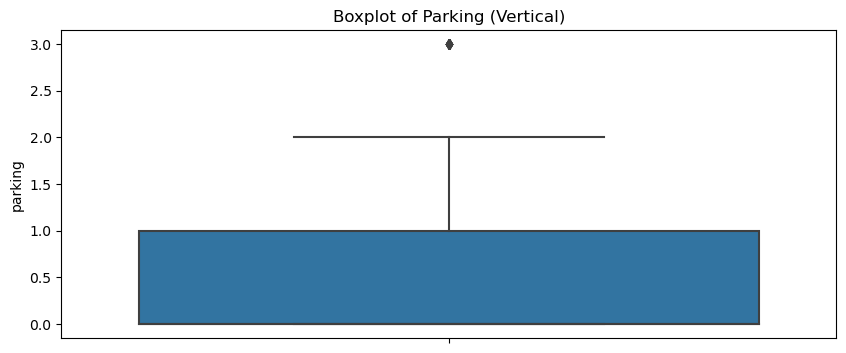

In [16]:
# Checking for outliers using a vertical boxplot
plt.figure(figsize=(10, 4)) # Taller figure for better vertical display
sns.boxplot(y=House_data['parking'])
plt.title("Boxplot of Parking (Vertical)")
plt.ylabel('parking')
plt.show()

I checked for outliers on these six column of the dataset such as: Price Area, Bedrooms, Bathrooms, Stories and Parking and i discovered they both have outliers which is below minimum percentail

## Data Transformation <a class="anchor" id="Transformation"></a>

Using one-hot econding and drop the first category to avoid multicollinearity

In [17]:
#creat a copy
prices_model=House_data.copy()

In [18]:
prices_model.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [19]:
#using one-hot econding and drop the first category to avoid multicollinearity
prices_model = pd.get_dummies(prices_model, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

In [20]:
#checking the dataset 
prices_model.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


# Exploratory Data Analysis <a class="anchor" id="EDA"></a>

## Univariate Analysis <a class="anchor" id="Univariate"></a>

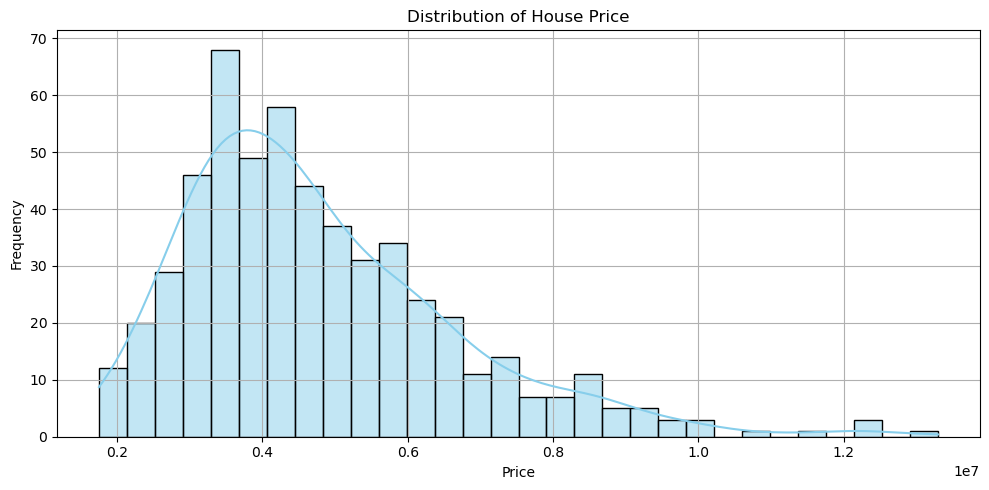

In [21]:
# Set the figsize
plt.figure(figsize= (10, 5))

# Use histogram with a density curve to see price distribution
sns.histplot(House_data['price'], bins=30, kde=True, color='skyblue')

# Add a title and label
plt.title('Distribution of House Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


I want to understand the range and frequency of prices

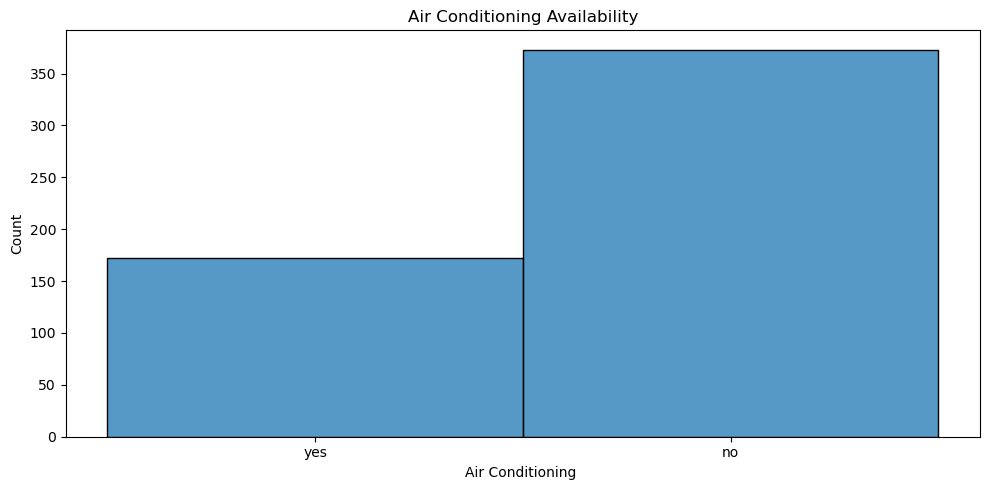

In [22]:
# Set the figsize
plt.figure(figsize= (10, 5))

# Create a bar chart to show counts of Airconditioning available
sns.histplot(House_data, x='airconditioning', palette='Set2')

# Add a title and labels
plt.title('Air Conditioning Availability')
plt.xlabel('Air Conditioning ')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


This is a basic count of 'Yes' vs 'No' values

## Bivariate Analysis <a class="anchor" id="Bivariate"></a>

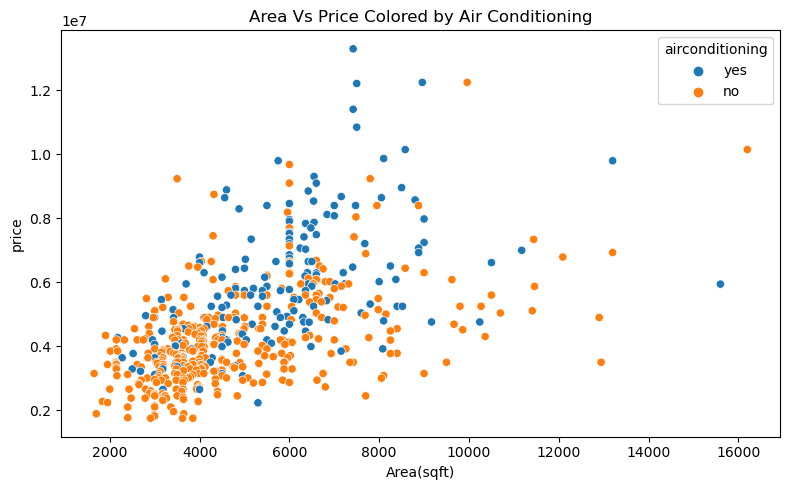

In [23]:
# Set the figsize
plt.figure(figsize= (8, 5))

# Scatter plot: area onx-axis, price on y-axis
# Colored by airconditioning to see if it influences price
sns.scatterplot(x='area', y='price', data=House_data, hue='airconditioning')

# Add a title and labels
plt.title('Area Vs Price Colored by Air Conditioning')
plt.xlabel('Area(sqft)')
plt.ylabel('price')
plt.tight_layout()
plt.show()


I use color to show whether the house has air condition

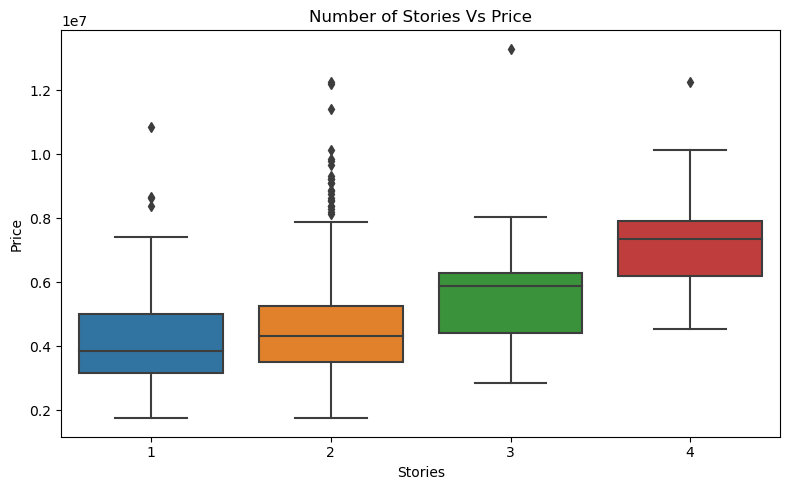

In [24]:
# Set the figsize
plt.figure(figsize= (8, 5))

# Create a box plot of stories vs price
sns.boxplot(x='stories', y='price', data=House_data,)

# label everthing
plt.title('Number of Stories Vs Price')
plt.xlabel('Stories')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


I visualize price variation accross 1-story, 2-story, etc

## Multivariate Analysis <a class="anchor" id="Multivariate"></a>

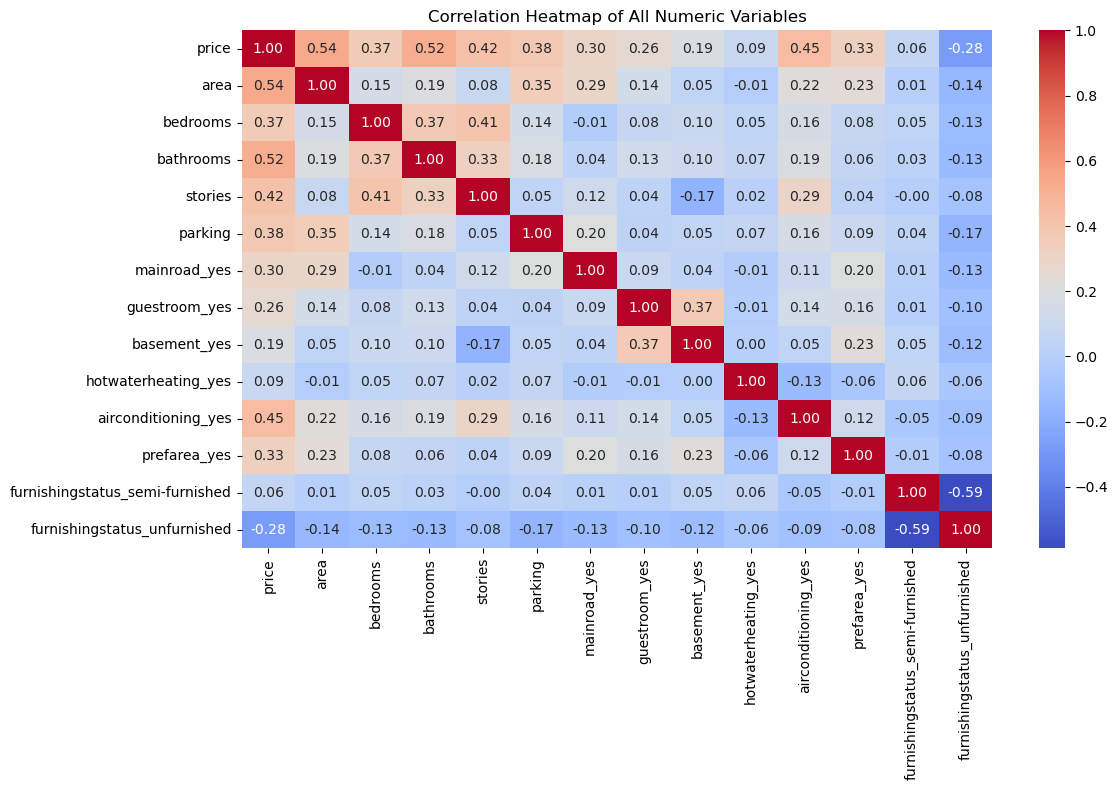

In [25]:
# Set the figsize
plt.figure(figsize= (12, 8,))

# Create heatmap of correlations between numeric features
sns.heatmap(prices_model.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title('Correlation Heatmap of All Numeric Variables')
plt.tight_layout()
plt.show()


I use a heatmap to check which variables are most correlated

In [26]:
# Choose important numeric columns
selected_features = ['price', 'area', 'bedrooms', 'bathrooms']

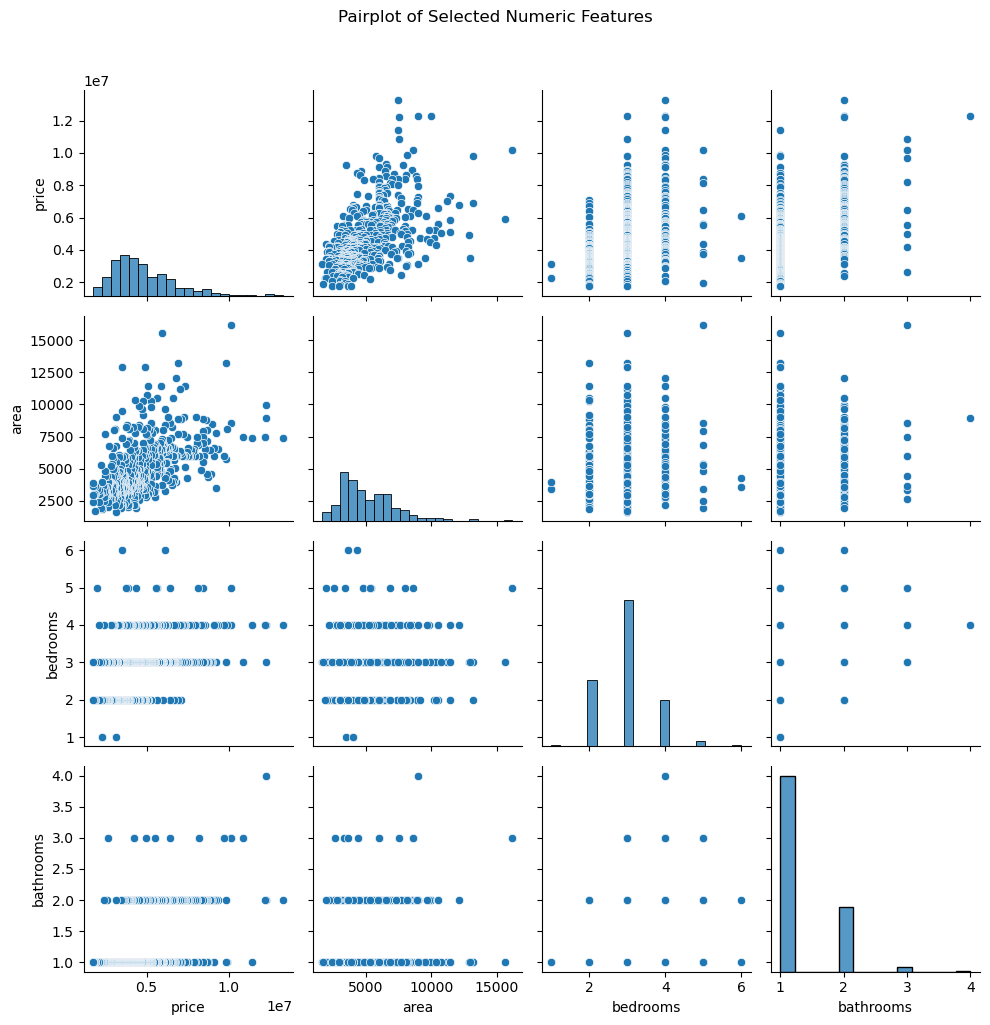

In [27]:
                
# Create a pairplot to show scatter plots and distributions
sns.pairplot(prices_model[selected_features])
                     
# Add a bit of spacing on the top for the title
plt.suptitle("Pairplot of Selected Numeric Features", y=1.02)
plt.tight_layout()
plt.show()                     

# Modelling <a class="anchor" id="Modelling"></a>

In [28]:
prices_model.columns = prices_model.columns.str.strip()

In [29]:
print(prices_model.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


In [30]:
#features (everything except the target)
x = prices_model.drop('price', axis=1)
#Target Variable
y = prices_model['price']


In [31]:
# View the dataset
prices_model

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [32]:
#80% Training, 20% Test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
#checking the size of the split
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 436
Testing samples: 109


## Linear Regression Model<a class="anchor" id="Training"></a>

In [33]:
#Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Prediction <a class="anchor" id="Prediction"></a> 

In [34]:
#predict on the test set
y_pred = model.predict(X_test)

## Model Evaluation <a class="anchor" id="Evaluation"></a>

In [35]:
# Metrics Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 1754318687330.6643
R2 Score: 0.6529242642153184


In [36]:
# show the comparison of Predicted Vs Actual Prices
comparison = pd.DataFrame({'Actual Price': y_test.values[:5],
                           'Predicted Price': y_pred[:5]
                          })

In [37]:
# I format the coefficient columns to use commas as thounsand separators
comparison['Actual Price'] = comparison['Actual Price'].apply(lambda x: f"{x:,.0f}")
comparison['Predicted Price'] = comparison['Predicted Price'].apply(lambda x: f"{x:,.0f}")

In [38]:
# View the first five rows
comparison

,Actual Price,Predicted Price
0,"4,060,000","5,164,654"
1,"6,650,000","7,224,722"
2,"3,710,000","3,109,863"
3,"6,440,000","4,612,075"
4,"2,800,000","3,294,646"


In [39]:
#Creat a dataframe for easy plotting
comparison_df =pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10]
})

In [40]:
#Creat bar width and indices
bar_width = 0.35
index = np.arange(len(comparison_df))

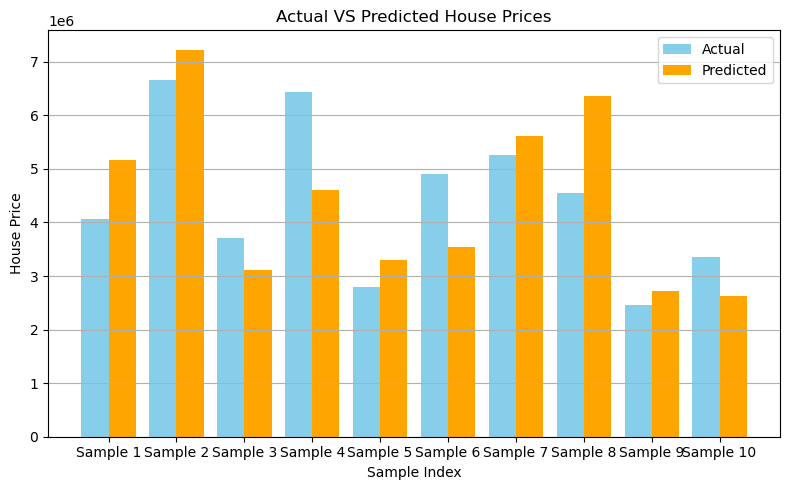

In [41]:
# Plot bar chart
plt.figure(figsize = (8, 5))
X = np.arange(len(comparison_df))
bar_width = 0.4

plt.bar(X - bar_width/2, comparison_df['Actual'], width=bar_width, label= 'Actual', color='skyblue')
plt.bar(X + bar_width/2, comparison_df['Predicted'], width=bar_width, label= 'Predicted', color='Orange')
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.title("Actual VS Predicted House Prices")
plt.xticks(X, [f"Sample {i+1}" for i in X])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

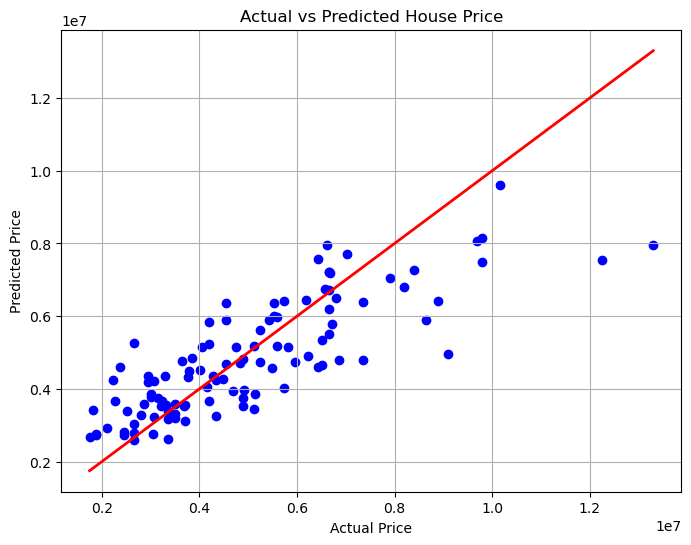

In [42]:
# Scater plot of Actual Vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted House Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

## Interpretation of Model Coefficients <a class="anchor" id="Interpretation"></a>


In [43]:
#Get the names of the original features (columns) used to train the model
columns_names = prices_model.drop('price', axis=1).columns                         

In [44]:
# Create a readable table showing which feature has which coefficient
coef_table = pd.DataFrame({
            'Feature': columns_names,
            'Coefficient':model.coef_
})

In [45]:
# Now i sort the table so that the most impacful feature are at the top
# This help us quickly see which one are pushing the price up or down the most
coef_table = coef_table.sort_values(by = 'Coefficient', ascending = False)
                            


In [46]:
# Finaly print the sorted list in the clean table format                           
print(coef_table) 

                            Feature   Coefficient
2                         bathrooms  1.094445e+06
9               airconditioning_yes  7.914267e+05
8               hotwaterheating_yes  6.846499e+05
10                     prefarea_yes  6.298906e+05
3                           stories  4.074766e+05
7                      basement_yes  3.902512e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
4                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


In [47]:
# Create a readable table showing which feature has which coefficient
coef_table = pd.DataFrame({
            'Feature': columns_names,
            'Coefficient':model.coef_
})

In [48]:
# I format the coefficient columns to use commas as thounsand separators
coef_table['Coefficient'] = coef_table['Coefficient'].apply(lambda x: f"{x:,.0f}")

In [49]:
# Finaly print the sorted list in the clean table format                           
print(coef_table) 

                            Feature Coefficient
0                              area         236
1                          bedrooms      76,779
2                         bathrooms   1,094,445
3                           stories     407,477
4                           parking     224,842
5                      mainroad_yes     367,920
6                     guestroom_yes     231,610
7                      basement_yes     390,251
8               hotwaterheating_yes     684,650
9               airconditioning_yes     791,427
10                     prefarea_yes     629,891
11  furnishingstatus_semi-furnished    -126,882
12     furnishingstatus_unfurnished    -413,645


## Visualize Feature Coefficients <a class="anchor" id="Coefficients"></a>

In [50]:
# First i need to make sure the coefficient columns is numeric
# (Inase i previously formatted it with commas for display)
coef_table['Coefficient'] = coef_table['Coefficient'].replace(',', '', regex=True).astype(float)

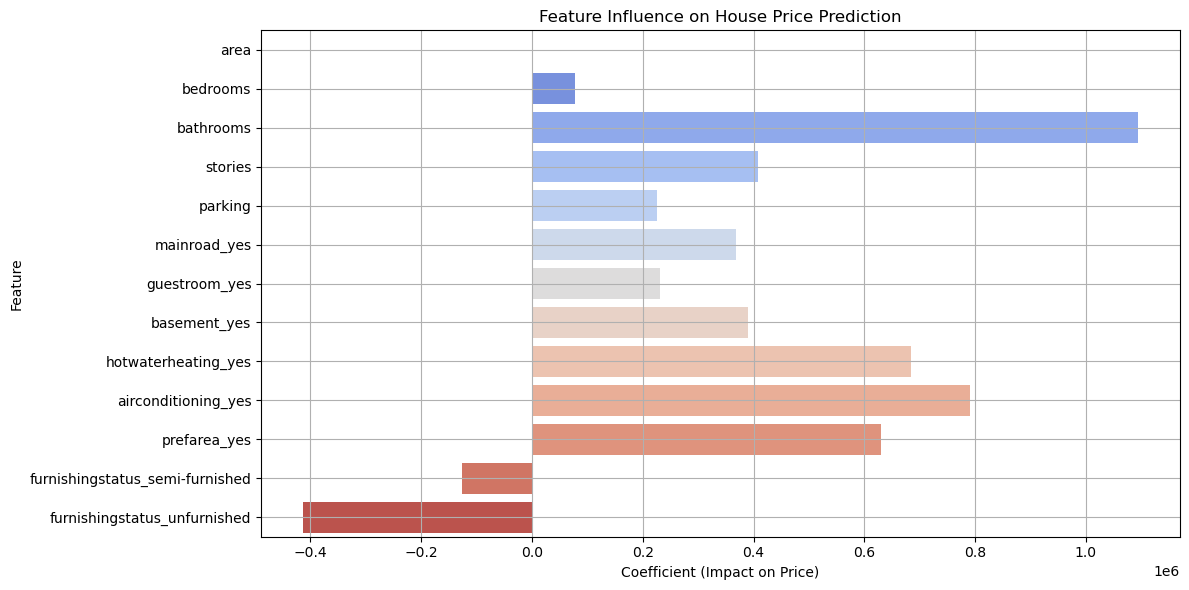

In [51]:
# Now i plot the coefficient as a horizontal bar chart
plt.figure(figsize=(12,6))

# Bar plot: feature name on the y-axis, coefficient on the x-axis
sns.barplot(x='Coefficient', y='Feature', data=coef_table, palette='coolwarm')
# Chart title and labels for clarity
plt.title("Feature Influence on House Price Prediction")
plt.xlabel('Coefficient (Impact on Price)')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

## Save the Results <a class="anchor" id="Results"></a>

In [52]:
# Save the coefficient table as a CSV file
coef_table.to_csv('feature_coefficients_v2.csv', index=False)  # Easy to open in Excel or google sheet

In [53]:
# Also save it as an Excel file prefer .xlsx
coef_table.to_excel('feature_coefficients.xlsx', index=False)

## Filter <a class="anchor" id="Filter"></a>

In [54]:
# Make sure the coefficient column is numeric
coef_table['Coefficient'] = coef_table['Coefficient'].replace(',', '', regex=True).astype(float)

In [55]:
# I filter table to keep only features with positive coefficient
positive_influence = coef_table[coef_table['Coefficient'] > 0]

In [56]:
# Print the result
print("🟢 Features that increase house price:")
print(positive_influence)

🟢 Features that increase house price:
                Feature  Coefficient
0                  area        236.0
1              bedrooms      76779.0
2             bathrooms    1094445.0
3               stories     407477.0
4               parking     224842.0
5          mainroad_yes     367920.0
6         guestroom_yes     231610.0
7          basement_yes     390251.0
8   hotwaterheating_yes     684650.0
9   airconditioning_yes     791427.0
10         prefarea_yes     629891.0


In [57]:
# I filter table to keep only features with positive coefficient
negative_influence = coef_table[coef_table['Coefficient'] < 0]

In [58]:
# Print the result
print("🔴 Features that decrease house price:")
print(negative_influence)

🔴 Features that decrease house price:
                            Feature  Coefficient
11  furnishingstatus_semi-furnished    -126882.0
12     furnishingstatus_unfurnished    -413645.0


## Confusion Matrix <a class="anchor" id="Confusion"></a>


In [59]:
# Create binary categories base on the medium price
median_price = y_test.median()


# Convert actual and predicted into class labels
y_test_class = np.where(y_test > median_price, 1, 0)
y_pred_class = np.where(y_pred > median_price, 1, 0)



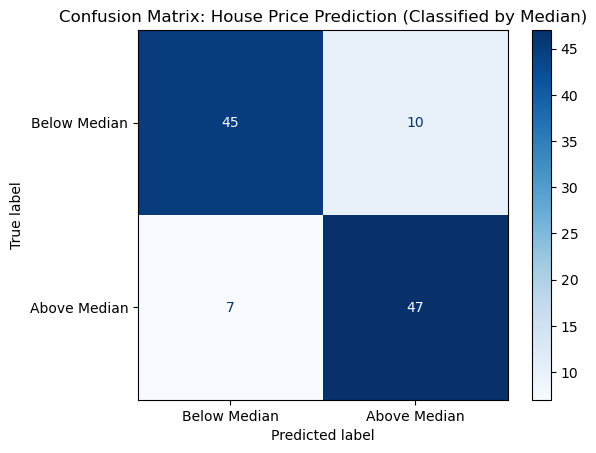

In [60]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Display the confusion matrix with label
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Below Median", "Above Median"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: House Price Prediction (Classified by Median)")
plt.show()

## 🧾 Summary<a class="anchor" id="Summary"></a>

💡 Key drivers increasing house price:
More bathrooms

* Air conditioning, hot water heating

* Being in a preferred area

* Additional stories, parking, basement, guest room

❗ Key factors that decrease house price:
Unfurnished or semi-furnished homes get priced significantly lower



## 📌 Recommendation <a class="anchor" id="Recommendation"></a>

* Guide renovation decisions: Add a bathroom or AC for value boost.

* Inform pricing strategies: Homes without hot water or furnishings may need discounts.

* Target marketing: Push well-equipped homes in preferred areas at a premium.

